<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>


</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users= pd.read_csv('/datasets/megaline_users.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')




## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans)
print()
print(plans.columns)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')


Por el momento no cambiaria ningun dato, las unidades que manejan (mb y USD) van a ser unidades consistentes para todas las tablas.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No se encontraron datos que necesiten correción.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Los datos parecen estar completos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
print(users.head(15))
print()
print(users.columns)
print()
print('Usuarios repetidos:',users.duplicated().sum())

    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   

                                         city    reg_date      plan  \
0       Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1             Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2        Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                               Tulsa, OK M

Tenemos que cambiar los valores ausentes en la columns churn_date y cambiar los datos de las fecahs a datetime format

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
users['churn_date'].fillna(0, inplace=True)
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d',errors='coerce')
users['churn_date'].fillna(0, inplace=True)
def to_dt(df,column):
    df[column]=pd.to_datetime(df[column],format='%Y-%m-%d')
    return df[column]
to_dt(users,'reg_date')
print(users.sample(10))

     user_id first_name  last_name  age  \
415     1415    Rosette     Mendez   56   
323     1323    Pamelia     Atkins   42   
107     1107       Lane       Cash   61   
76      1076      Ronny   Browning   51   
497     1497      Donte    Barrera   49   
354     1354     Leonel       Dyer   41   
120     1120    Abraham  Mcconnell   33   
374     1374      Ching      Watts   55   
396     1396    Ardelia     Benton   65   
493     1493     Cicely       Wynn   18   

                                          city   reg_date      plan churn_date  
415         Boston-Cambridge-Newton, MA-NH MSA 2018-02-27      surf 1970-01-01  
323          Baltimore-Columbia-Towson, MD MSA 2018-12-30      surf 1970-01-01  
107  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-11-15  ultimate 1970-01-01  
76                 Buffalo-Cheektowaga, NY MSA 2018-07-29      surf 1970-01-01  
497     Los Angeles-Long Beach-Anaheim, CA MSA 2018-12-10  ultimate 1970-01-01  
354  New York-Newark-Jersey City, NY-NJ-

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Por el momento no veo necesario agregar ningun tipo de columna o dato.

## Llamadas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
print()
print(calls.columns)
print()
print('Llamadas repetidas:',calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

Llamadas repetidas: 0


In [9]:
# Imprime una muestra de datos para las llamadas
print(calls)
print(calls['call_date'].max())
print(calls['call_date'].min())


              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]
2018-12-31
2018-01-15


Me parece que sería mas facil tener la duración real cobrada, es decir, 4.31 --> 5
### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
calls['duration']=np.ceil(calls['duration']).astype(int)
to_dt(calls,'call_date')
print(calls)
calls.info()

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27         9
1       1000_145     1000 2018-12-27        14
2       1000_247     1000 2018-12-27        15
3       1000_309     1000 2018-12-28         6
4       1000_380     1000 2018-12-30         5
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21         9
137731  1499_200     1499 2018-10-20        11
137732  1499_201     1499 2018-09-21         9
137733  1499_202     1499 2018-10-10         1
137734  1499_203     1499 2018-12-29        14

[137735 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: dat

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
calls['month']=calls['call_date'].dt.month
print(calls)

              id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27         9     12
1       1000_145     1000 2018-12-27        14     12
2       1000_247     1000 2018-12-27        15     12
3       1000_309     1000 2018-12-28         6     12
4       1000_380     1000 2018-12-30         5     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21         9     11
137731  1499_200     1499 2018-10-20        11     10
137732  1499_201     1499 2018-09-21         9      9
137733  1499_202     1499 2018-10-10         1     10
137734  1499_203     1499 2018-12-29        14     12

[137735 rows x 5 columns]


## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()
print()
print(messages.columns)
print()
print('Mensajes repetidos:', messages.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Index(['id', 'user_id', 'message_date'], dtype='object')

Mensajes repetidos: 0


In [13]:
# Imprime una muestra de datos para los mensajes
print(messages)


             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


Cambiar el tipo de dato en la fecha

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
to_dt(messages,'message_date')
print(messages)
messages.info()

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
messages['month']=messages['message_date'].dt.month
print(messages)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


## Internet

In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
print()
print(internet.columns)
print()
print('Datos de internet repetidos', internet.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

Datos de internet repetidos 0


In [17]:
# Imprime una muestra de datos para el tráfico de internet
print(internet)


              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


Cambiar el tipo de datos de las fechas y extraer el mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
to_dt(internet,'session_date')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
internet['month']=internet['session_date'].dt.month
print(internet)

              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [20]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [21]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
print(calls.head())
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')
calls_per_month = calls_per_month.sort_values(['user_id', 'month'])

print(calls_per_month.head(20))


         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12
    user_id  month  num_calls
0      1000     12         16
1      1001      8         27
2      1001      9         49
3      1001     10         65
4      1001     11         64
5      1001     12         56
6      1002     10         11
7      1002     11         55
8      1002     12         47
9      1003     12        149
10     1004      5         21
11     1004      6         44
12     1004      7         49
13     1004      8         49
14     1004      9         42
15     1004     10         61
16     1004     11         54
17     1004     12         50
18     1005     12         59
19     1006     11          2


In [22]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
call_duration_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_duration')
call_duration_month = call_duration_month.sort_values(['user_id', 'month'])
print(call_duration_month)

      user_id  month  total_duration
0        1000     12             124
1        1001      8             182
2        1001      9             315
3        1001     10             393
4        1001     11             426
...       ...    ...             ...
2253     1498     12             339
2254     1499      9             346
2255     1499     10             385
2256     1499     11             308
2257     1499     12             496

[2258 rows x 3 columns]


In [23]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
print(messages.head())
messages_per_month=messages.groupby(['user_id','month']).size().reset_index(name='num_messages')
messages_per_month=messages_per_month.sort_values(['user_id','month'])


print(messages_per_month)


         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12
      user_id  month  num_messages
0        1000     12            11
1        1001      8            30
2        1001      9            44
3        1001     10            53
4        1001     11            36
...       ...    ...           ...
1801     1496      9            21
1802     1496     10            18
1803     1496     11            13
1804     1496     12            11
1805     1497     12            50

[1806 rows x 3 columns]


In [24]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
print(internet)
session_duration_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_usage')
session_duration_month = session_duration_month.sort_values(['user_id', 'month'])
print(session_duration_month)


              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]
      user_id  month  total_usage
0        1000     12      1901.47
1        1001      8      6919.15
2        1001      9     13314.82
3        1001     10     22330.49
4        1001     11     18504.30
...       ...    ...          ...
2272     1498     12     23137.69
2273     1499      9     12984.76
2274   

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [25]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

usage_per_user=pd.merge(call_duration_month[['user_id','month','total_duration']],
                        messages_per_month[['user_id','num_messages','month']],
                        on=['user_id','month'],
                        how='left')
usage_per_user=pd.merge(usage_per_user[['user_id','month','total_duration','num_messages']],
                        session_duration_month[['user_id','month','total_usage']],
                        on=['user_id','month'],
                        how='left')
new_names={
    'total_duration' : 'call_minutes',
    'num_messages' : 'messages_count',
    'total_usage' : 'mb_usage'
}
usage_per_user=usage_per_user.rename(columns=new_names)

usage_per_user['messages_count'].fillna(0,inplace=True)
usage_per_user['mb_usage'].fillna(0,inplace=True)
for column in usage_per_user.columns:
    print(f'La columna {column} tiene',usage_per_user[column].isna().sum(),'valores vacios')
print()
print()
print('Hay',usage_per_user.duplicated().sum(),'valores repetidos')
print()
print()
print(usage_per_user)
print(usage_per_user.columns)

La columna user_id tiene 0 valores vacios
La columna month tiene 0 valores vacios
La columna call_minutes tiene 0 valores vacios
La columna messages_count tiene 0 valores vacios
La columna mb_usage tiene 0 valores vacios


Hay 0 valores repetidos


      user_id  month  call_minutes  messages_count  mb_usage
0        1000     12           124            11.0   1901.47
1        1001      8           182            30.0   6919.15
2        1001      9           315            44.0  13314.82
3        1001     10           393            53.0  22330.49
4        1001     11           426            36.0  18504.30
...       ...    ...           ...             ...       ...
2253     1498     12           339             0.0  23137.69
2254     1499      9           346             0.0  12984.76
2255     1499     10           385             0.0  19492.43
2256     1499     11           308             0.0  16813.83
2257     1499     12           496             0.0  22059.21

[2258 rows x 5 col

In [26]:
# Añade la información de la tarifa
usage_per_user=pd.merge(usage_per_user[['user_id', 'month', 'call_minutes', 'messages_count', 'mb_usage']],
                       users[['user_id','plan']],
                       on='user_id',
                       how='left')
print(usage_per_user)

      user_id  month  call_minutes  messages_count  mb_usage      plan
0        1000     12           124            11.0   1901.47  ultimate
1        1001      8           182            30.0   6919.15      surf
2        1001      9           315            44.0  13314.82      surf
3        1001     10           393            53.0  22330.49      surf
4        1001     11           426            36.0  18504.30      surf
...       ...    ...           ...             ...       ...       ...
2253     1498     12           339             0.0  23137.69      surf
2254     1499      9           346             0.0  12984.76      surf
2255     1499     10           385             0.0  19492.43      surf
2256     1499     11           308             0.0  16813.83      surf
2257     1499     12           496             0.0  22059.21      surf

[2258 rows x 6 columns]


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [27]:
# Calcula el ingreso mensual para cada usuario
print(plans)
import math
usage_per_user.info()
usage_per_user['month_income']=0
usage_per_user['month_income'] = usage_per_user['month_income'].astype(float)
for index, row in usage_per_user.iterrows():
    calls = row['call_minutes']
    messages = row['messages_count']
    mb = row['mb_usage']
    plan = row['plan']
    
    if plan == 'surf':
        income = 20
        if calls > 500:
            call_extra = (calls - 500) * 0.03
            income += call_extra
        if messages > 50:
            message_extra = (messages - 50) * 0.03
            income += message_extra
        if mb > 15360:
            mb_extra = math.ceil((mb - 15360) / 1024) * 10
            income += mb_extra
        usage_per_user.at[index, 'month_income'] = income
            
    else: 
        income = 70
        if calls > 3000:
            call_extra = (calls - 3000) * 0.01
            income += call_extra
        if messages > 1000:
            message_extra = (messages - 1000) * 0.01  
            income += message_extra
        if mb > 30720:
            mb_extra = math.ceil((mb - 30720) / 1024) * 7
            income += mb_extra
        usage_per_user.at[index, 'month_income'] = income
print(usage_per_user) 





   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2258 non-null   int64  
 1   month           2258 non-null   int64  
 2   call_minutes    2258 non-null   int64  
 3   messages_count  2258 non-null   float64
 4   mb_usage        2258 non-null   float64
 5   plan            2258 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 123.5+ KB
      user_id  month  call_minutes  messages_c

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

    month  duration_surf  duration_ultimate
0       1     203.000000         193.500000
1       2     297.000000         470.333333
2       3     330.000000         304.250000
3       4     351.540000         336.857143
4       5     410.240000         406.241379
5       6     435.791667         387.444444
6       7     453.733333         427.067797
7       8     417.849057         421.436620
8       9     420.732984         437.511628
9      10     438.991379         455.028571
10     11     432.494585         448.730159
11     12     484.501608         465.261745


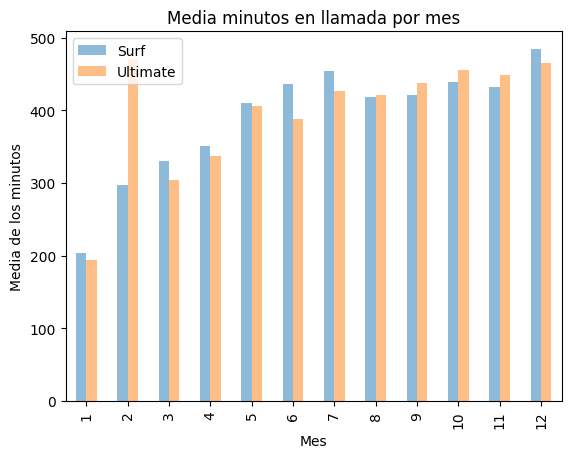

In [28]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
calls_surf_month= usage_per_user[usage_per_user['plan']=='surf'][['month','call_minutes']]
calls_ultimate_month=usage_per_user[usage_per_user['plan']=='ultimate'][['month','call_minutes']]
calls_surf_month_mean=calls_surf_month.groupby('month')['call_minutes'].mean().reset_index(name='duration_surf')
calls_ultimate_month_mean=calls_ultimate_month.groupby('month')['call_minutes'].mean().reset_index(name='duration_ultimate')
comparison_minutes_mean=pd.merge(calls_surf_month_mean[['month','duration_surf']],
                                 calls_ultimate_month_mean[['month','duration_ultimate']],
                                 on='month',
                                 how='left')
print(comparison_minutes_mean)

comparison_minutes_mean.plot(x='month',
                           y=['duration_surf','duration_ultimate'],
                           title='Media minutos en llamada por mes',
                           xlabel='Mes',
                           ylabel='Media de los minutos',
                           kind='bar',
                          alpha=0.5)

plt.legend(['Surf','Ultimate'])
plt.show()




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes
</div>


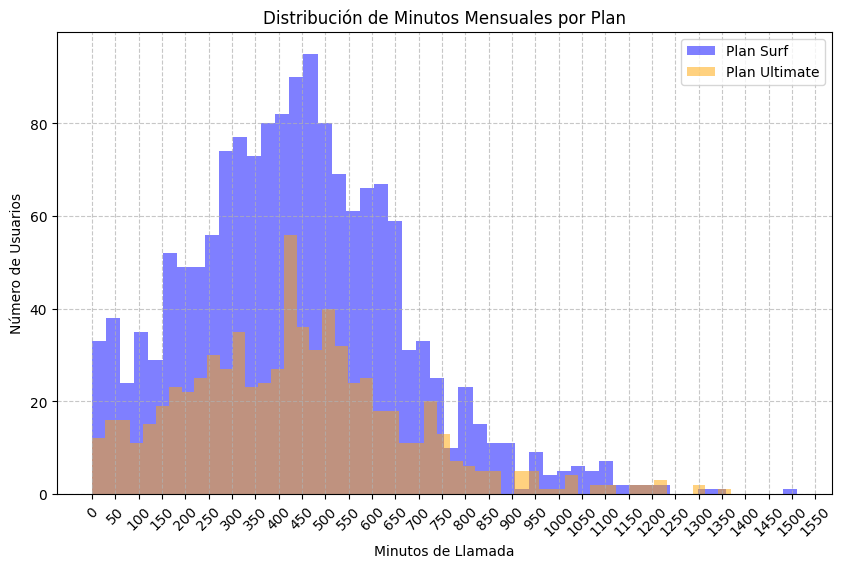

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import matplotlib.pyplot as plt
surf_minutes = usage_per_user[usage_per_user['plan'] == 'surf']['call_minutes']
ultimate_minutes = usage_per_user[usage_per_user['plan'] == 'ultimate']['call_minutes']
plt.figure(figsize=(10, 6))
plt.hist(
    surf_minutes,
    bins=50,  
    alpha=0.5,  
    label='Plan Surf',
    color='blue'
)

plt.hist(
    ultimate_minutes,
    bins=50,
    alpha=0.5,
    label='Plan Ultimate',
    color='orange'
)

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos de Llamada')
plt.ylabel('Número de Usuarios')
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 1600, 50))
plt.xticks(rotation=45)



plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [30]:
# Calcula la media y la varianza de la duración mensual de llamadas.
stats_per_plan= usage_per_user.groupby('plan')['call_minutes'].agg(['mean', 'var'])
print(stats_per_plan)


                mean           var
plan                              
surf      436.519741  52571.063243
ultimate  434.676017  56573.632247


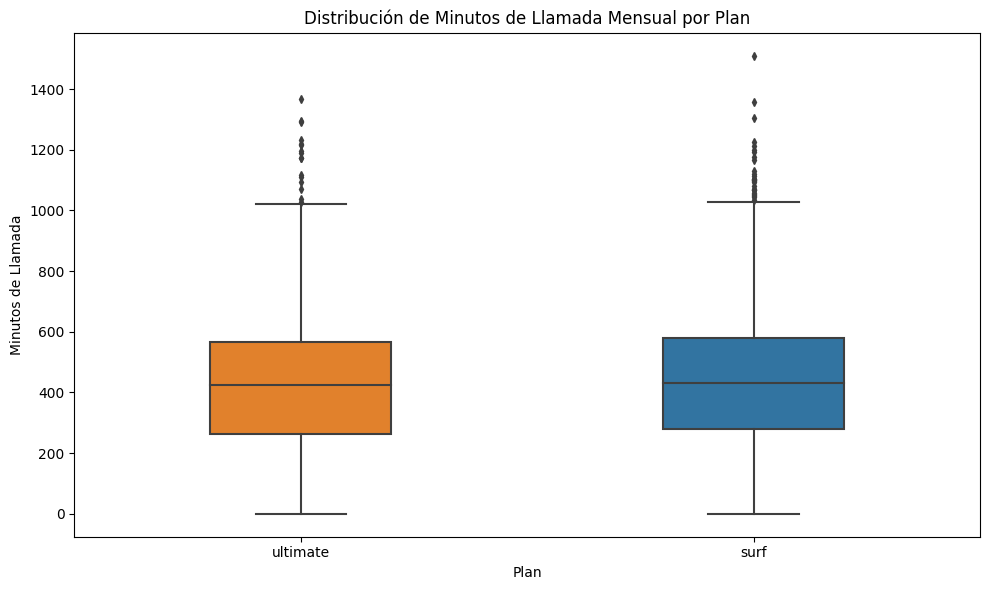

In [31]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='plan',
    y='call_minutes',
    data=usage_per_user,
    palette={'surf': '#1f77b4', 'ultimate': '#ff7f0e'}, 
    width=0.4,
    linewidth=1.5,
    fliersize=4
)
plt.title('Distribución de Minutos de Llamada Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos de Llamada')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los diagramas de caja nos permiten ver la distribución de ambos conjuntos de datos de una manera clara

</div>


### Mensajes

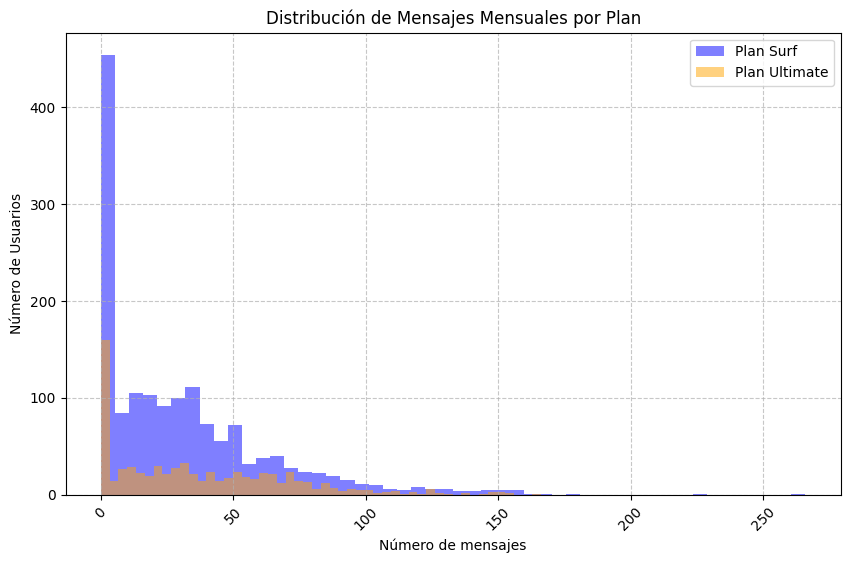

In [33]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

surf_messages = usage_per_user[usage_per_user['plan'] == 'surf']['messages_count']
ultimate_messages = usage_per_user[usage_per_user['plan'] == 'ultimate']['messages_count']
plt.figure(figsize=(10, 6))
plt.hist(
    surf_messages,
    bins=50,  
    alpha=0.5,  
    label='Plan Surf',
    color='blue'
)

plt.hist(
    ultimate_messages,
    bins=50,
    alpha=0.5,
    label='Plan Ultimate',
    color='orange'
)

plt.title('Distribución de Mensajes Mensuales por Plan')
plt.xlabel('Número de mensajes')
plt.ylabel('Número de Usuarios')
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 300, 50))
plt.xticks(rotation=45)



plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar los resultados de los mensajes, se puede ver como en un plan se utilizan más que en el otro
</div>


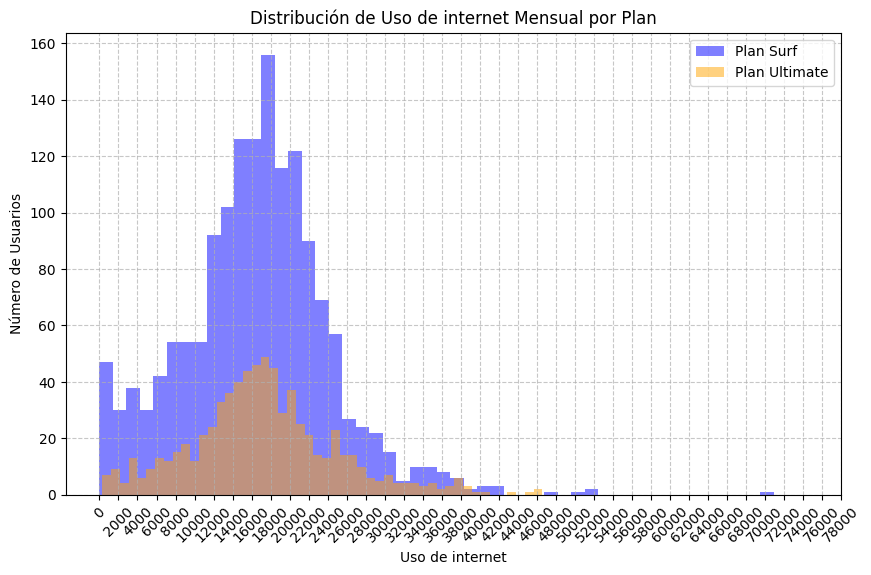

In [34]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_mb = usage_per_user[usage_per_user['plan'] == 'surf']['mb_usage']
ultimate_mb = usage_per_user[usage_per_user['plan'] == 'ultimate']['mb_usage']
plt.figure(figsize=(10, 6))
plt.hist(
    surf_mb,
    bins=50,  
    alpha=0.5,  
    label='Plan Surf',
    color='blue'
)

plt.hist(
    ultimate_mb,
    bins=50,
    alpha=0.5,
    label='Plan Ultimate',
    color='orange'
)

plt.title('Distribución de Uso de internet Mensual por Plan')
plt.xlabel('Uso de internet')
plt.ylabel('Número de Usuarios')
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 80000, 2000))
plt.xticks(rotation=45)
plt.show()

In [35]:
print('Hay',usage_per_user[usage_per_user['plan']=='surf']['user_id'].count(),'usarios con plan Surf')
print('Hay',usage_per_user[usage_per_user['plan']=='ultimate']['user_id'].count(),'usarios con plan Ultimate')


Hay 1545 usarios con plan Surf
Hay 713 usarios con plan Ultimate


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

Podemos observar que la media de los usuarios, tanto para el plan surf como par ultimate, se situa alrededor de 16,000 mb usados por mes.

El plan Surf parece estar diseñado para que en la media de los casos se quede un poco abajo del uso mensual.

La distribución de usuarios para ambos planes se comporta de forma muy similar.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

Debemos mantener un orden en el proyecto, la grafica sobre el consumo de datos debería estar en esta parte y no en la parte anterior
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

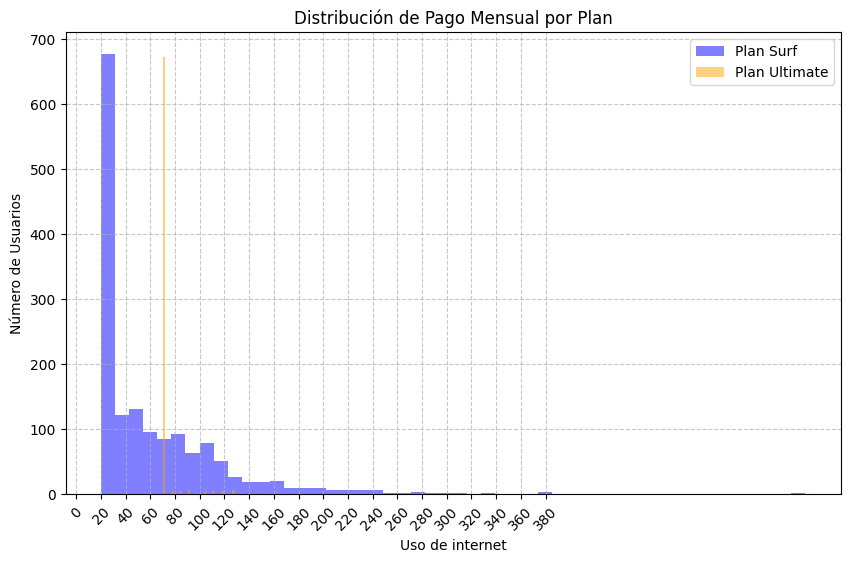

In [36]:
surf_income = usage_per_user[usage_per_user['plan'] == 'surf']['month_income']
ultimate_income = usage_per_user[usage_per_user['plan'] == 'ultimate']['month_income']
plt.figure(figsize=(10, 6))
plt.hist(
    surf_income,
    bins=50,  
    alpha=0.5,  
    label='Plan Surf',
    color='blue'
)

plt.hist(
    ultimate_income,
    bins=50,
    alpha=0.5,
    label='Plan Ultimate',
    color='orange'
)

plt.title('Distribución de Pago Mensual por Plan')
plt.xlabel('Uso de internet')
plt.ylabel('Número de Usuarios')
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 400, 20))
plt.xticks(rotation=45)
plt.show()



In [37]:
print('El pago máximo realizado en un plan Surf es:', surf_income.max())
print('El pago máximo realizado en un plan Ultimate es:', ultimate_income.max())
print('Los usuarios con plan Surf pagan',usage_per_user[usage_per_user['plan']=='surf']['month_income'].mean(),'en promedio')
print('Los usuarios con plan Ultimate pagan',usage_per_user[usage_per_user['plan']=='ultimate']['month_income'].mean(),'en promedio')

El pago máximo realizado en un plan Surf es: 590.37
El pago máximo realizado en un plan Ultimate es: 182.0
Los usuarios con plan Surf pagan 60.125514563106805 en promedio
Los usuarios con plan Ultimate pagan 72.27769985974754 en promedio


La media del pago realizado de los usuarios con Surf está muy cercana al pago que realizan los usuarios con plan Ultimate.

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [38]:
stats_income_per_plan= usage_per_user.groupby('plan')['month_income'].agg(['mean', 'var'])
print(stats_income_per_plan)

               mean          var
plan                            
surf      60.125515  2865.818321
ultimate  72.277700   128.866595


H0= Los usuarios con plan Surf pagan mas que los ultimate.

In [39]:
# Prueba las hipótesis
hip_nula_1=usage_per_user[usage_per_user['plan']=='surf']['month_income']
alpha=0.05
interested_value=70
results = st.ttest_1samp(hip_nula_1,interested_value)

print('valor p:', results.pvalue/2) 
      
if (results.pvalue / 2 < alpha)and(hip_nula_1.mean() < interested_value):

    print("Rechazamos la hipótesis nula: los ingresos fueron significativamente inferiores a 70 dólares")
else:
    print(
        "No podemos rechazar la hipótesis nula: los ingresos no fueron significativamente inferiores"
    )


valor p: 3.274984220789092e-13
Rechazamos la hipótesis nula: los ingresos fueron significativamente inferiores a 70 dólares


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
# Prueba las hipótesis
users['ny_area']= 0 
users.loc[users['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'ny_area'] = 1
usage_per_user=pd.merge(usage_per_user[['user_id', 'month', 'call_minutes', 'messages_count', 'mb_usage','plan', 'month_income']],
                        users[['user_id','ny_area']],
                        on='user_id',
                        how='left')

income_ny=usage_per_user[usage_per_user['ny_area']==1]['month_income']
income_not_ny=usage_per_user[usage_per_user['ny_area']==0]['month_income']

alpha = 0.05

results = st.ttest_ind(income_ny,income_not_ny,equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue > alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")





valor p: 0.013118130086619653
No podemos rechazar la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Los usuarios con el plan surf paga un precio apenas por debajo del utlimate.

La mayor parte de sobre cargos se da en el uso del internet.

Faltaron realizar mas análisis considerando la edad de los usuarios para tener un mejor panorma del uso de datos.

In [ ]:
Seccionar por ciudades podría arrojar diferentes resultados.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>
